

A esperança matemática da ponte Browniana  $ B_t $ é dada por:

$$
\mathbb{E}[B_t] = \mathbb{E}\left[\tilde{B_t} + a\left(\frac{t_1 - t}{t_1 - t_0}\right) + b\left(\frac{t - t_0}{t_1 - t_0}\right)\right]
$$

Como $ \mathbb{E}[\tilde{B_t}] = 0 $:

$$
\mathbb{E}[B_t] =  a\left(\frac{t_1 - t}{t_1 - t_0}\right) + b\left(\frac{t - t_0}{t_1 - t_0}\right)
$$

Repare que na questão número 2, fizemos os cálculos da esperança e variância para o nosso processo $B_t$ com $ t \in [0,T]$ e com $a = 0$ e $b=0$.

E nela achamos o seguinte valor para a $ \mathrm{Var}[B_t] = (T-t) \frac{t}{T} $. Esse valor para a variância é levando em consideção $t$ em $ [0,T] $, porém nosso intervalo atual é $ [t_1, t_2 ] $. Dessa forma, precisamos adequar os valores de $T-0$ para $t_2 - t_1$ e de $t-0$ para $ t - t_1$.

Então podemos aplicar uma transformação linear nos intervalos e teremos:

<br>

$$ T - 0 = t_2 - t_1 $$

$$ t - 0 = t - t_1 $$


<br>

Dessa forma, temos a fórmula da $ \mathrm{Var}[B_t]$ para o caso geral que é dada por:

<br>

$$ \mathrm{Var}(B_t) = (T - t) \frac{t}{T} = \frac{\left( t_2 - t_1 - (t - t_1) \right)}{t_2 - t_1} \cdot (t - t_1) = \frac{t_2 - t}{t_2 - t_1} \cdot (t - t_1)
$$

<br>

Obs.: Não precisamos nos preocupar com as constantes $a$ e $b$, pois essas constantes não afetam no resultado final da variância.

<br>

Basta olhar para:

<br>

$ \mathrm{Var}(B_t) = \mathrm{Var}\left(\tilde{B_t} + a\left(\frac{t_1 - t}{t_1 - t_0}\right) + b\left(\frac{t - t_0}{t_1 - t_0}\right)\right)
 $

E a partir daqui usar a propriedade de que :

$$ Var[X + b] = Var[X]$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parâmetros
t0 = 3
t1 = 8
a = 2
b = -4
N = 10000  # Número de pontos
paths = 50 # Número de caminhos aleatórios

In [ ]:
def ponte_browniana(ti = t0, tf = t1, a = a, b = b, N = N, paths = paths):
  #Gerando o processo de wierner de 0 a 1
  W = np.zeros((paths, N))

  for path in range(paths):
    dW = np.random.normal(0, np.sqrt((1)/N), N-1)
    W[path, 1:] = np.cumsum(dW)

  #Gerando a ponte browniana padrão B_til
  t = np.linspace(0, 1, N)
  B_til = np.zeros((paths, N))

  for path in range(paths):
    B_til[path, 1:] = W[path, 1:] - t[1:]*W[path][-1]

  #Gerando a ponte browniana desejada
  B = np.zeros((paths, N))
  ts = np.linspace(ti, tf, N)

  for path in range(paths):
    B[path] = B_til[path] + a*(tf - ts)/(tf - t0) + b*(ts - ti)/(tf - ti)

  return ts, B

In [ ]:
# Gera a ponte Browniana
t, B_t = ponte_browniana()

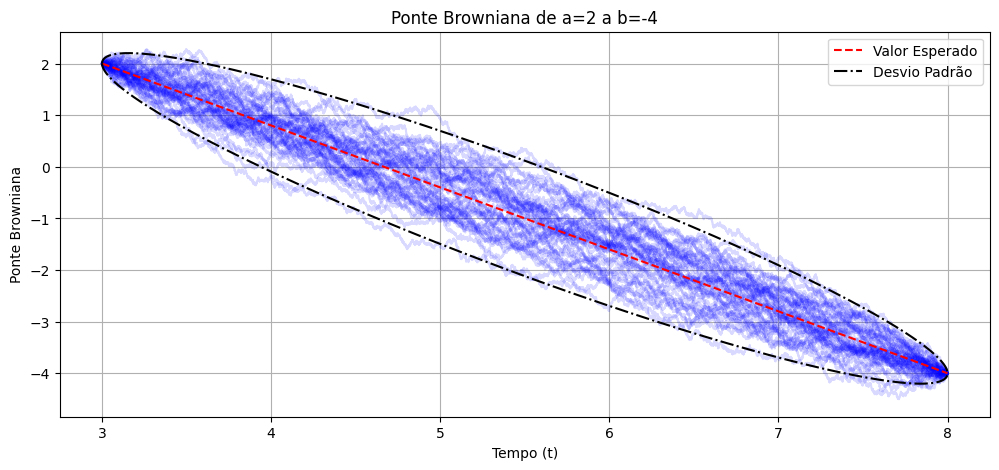

In [ ]:
# Plota os resultados

plt.figure(figsize=(12,5))
for path in range(paths):
  plt.plot(t, B_t[path], color = 'blue', alpha = 0.15)

plt.xlabel('Tempo (t)')
plt.ylabel('Ponte Browniana')
plt.title('Ponte Browniana de a={} a b={}'.format(a, b))
plt.grid(True)

# Calcula o valor esperado e o desvio padrão
valor_esperado = a*(t1 - t)/(t1 - t0) + b*(t - t0)/(t1 - t0)  # E[Bt]
desvio_padrao = np.sqrt( (t1 - t)*(t-t0)/(t1-t0) ) # σ(Bt)

plt.plot(t, valor_esperado, 'r--', label='Valor Esperado')
plt.plot(t, valor_esperado + desvio_padrao, 'k-.', label='Desvio Padrão')
plt.plot(t, valor_esperado - desvio_padrao, 'k-.')
plt.legend()

plt.show()